#**CÁLCULO DE TIR**

**El Archivo debe tener estos campos**
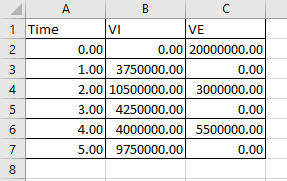

**PASOS**



1. Ingrese a carpeta de archivos:
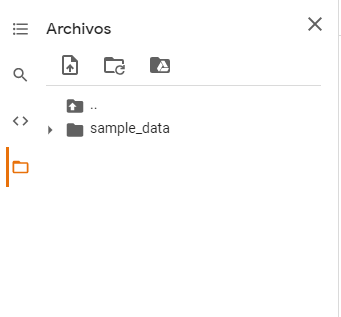



2. Clic en subir archivo en el primer icono.
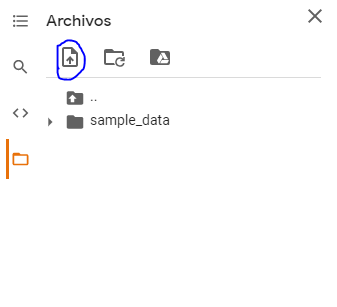

3. Copie la ruta e ingreselo al programa.
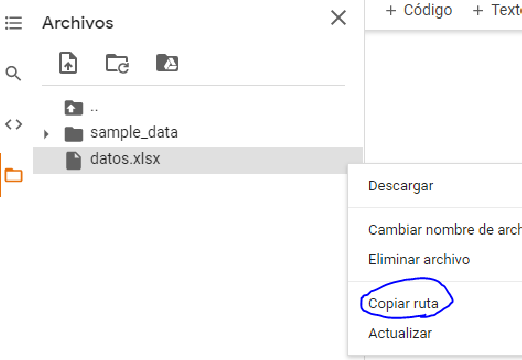



> Ingrese ruta y precione **play**



In [1]:
datos = "/datos.xlsx" #@param {type:"string"}
from scipy.misc import derivative
import numpy as np
import pandas as pd


   
def cargar_datos(path):
    """
    Parameters
    ----------
    path : TYPE string
        DESCRIPTION. Is the location of the file on the pc

    Returns
    -------
    document : TYPE dataframe
        DESCRIPTION. Is a dictionary with the dates of the archive

    """
    
    document = pd.read_excel(path)
    return document


class VAN:
    def __init__(self,dataframe):
        self.__dataframe = dataframe
    def __cash_flow_function(self,cash,time,TMAR):
        """
        Parameters
        ----------
        cash : TYPE float
            DESCRIPTION. Net cash at the end of a given year
        time : TYPE
            DESCRIPTION. Year ended evaluated
        TMAR : TYPE float 
            DESCRIPTION. Attractive minimum rate of return

        Returns
        -------
        answer : TYPE float
            DESCRIPTION.

        """
        answer = (cash)/((1+TMAR)**time)
        return answer
    
    def __TIR_Approximate(self,dataframe):
        """
        Parameters
        ----------
        dataframe : TYPE dataframe
            DESCRIPTION.Is a dictionary with the dates of the archive

        Returns
        -------
        answer : TYPE float
            DESCRIPTION. TIR_Approximate

        """
        VNE = sum(list(dataframe['VE']))
        VNI = sum(list(dataframe['VI']))
        answer = ((VNI/VNE) - 1)/(len(dataframe)-1)
        return answer
    
    def __derivate(self,TIR):
        """
        Parameters
        ----------
        dataframe : TYPE dataframe
            DESCRIPTION. matrix of data 
        TIR : TYPE float
            DESCRIPTION. internal rate of return
    
        Returns
        -------
        df : TYPE
            DESCRIPTION. Derived at a point
    
        """
        h = 1e-10
        TIRi = TIR + h
        TIR0 = TIR
        
        fi = -self.__dataframe['VE'][0] + sum([ self.__cash_flow_function(ingreso, n, TIRi) for ingreso,n in zip(self.__dataframe['VI'],self.__dataframe['Time']) if n != 0.0 ]) - sum([ self.__cash_flow_function(egreso, n, TIRi) for egreso,n in zip(self.__dataframe['VE'],self.__dataframe['Time']) if n != 0.0])
        f0 = -self.__dataframe['VE'][0] + sum([ self.__cash_flow_function(ingreso, n, TIR0) for ingreso,n in zip(self.__dataframe['VI'],self.__dataframe['Time']) if n != 0.0]) - sum([ self.__cash_flow_function(egreso, n, TIR0) for egreso,n in zip(self.__dataframe['VE'],self.__dataframe['Time']) if n != 0.0])
        
        df = (fi - f0)/h
        
        return df
    def __function(self,TIR):
        """
        Parameters
        ----------
        dataframe : TYPE dataframe
            DESCRIPTION. matrix of data
        TIR : TYPE float
            DESCRIPTION. internal rate of return
    
        Returns
        -------
        f : TYPE float 
            DESCRIPTION. evaluated function
    
        """
        f = -self.__dataframe['VE'][0] + sum([ self.__cash_flow_function(ingreso, n, TIR) for ingreso,n in zip(self.__dataframe['VI'],self.__dataframe['Time']) if n != 0.0 ]) - sum([ self.__cash_flow_function(egreso, n, TIR) for egreso,n in zip(self.__dataframe['VE'],self.__dataframe['Time']) if n != 0.0])
        return f
    
    def __Newton_method(self):
        tolerance = 1e-6
        p0 = self.__TIR_Approximate(self.__dataframe) 
        n = 1000
        p = 0
        i = 1 # paso 1
        while i <= n: #paso 2 -> se hace el paso 3-6
            p = p0 - self.__function(p0) / self.__derivate(p0) #paso 3 calculo de pi
            if abs(p-p0) < tolerance: 
                return(p) # paso 4:  el procedimiento fue exitoso
            i += 1 # paso 5 : seguimos buscando
            p0 = p #paso 6 : cambiaos
        return "No se pudo encontrar la raiz"
    
    def execute(self):
        return self.__Newton_method()
    def executeTIRAprox(self):
        return self.__TIR_Approximate(self.__dataframe)






> Precione **play**





>**El valor TIR del archivo dado es:**



In [2]:
try:
  doc = cargar_datos(datos)
  van = VAN(doc)
  print("El resultado del TIR es: ",van.execute())
except Exception as e:
  print("Hubo un error tipo:",e)


El resultado del TIR es:  0.0578415283295872
